In [1]:
import sys
sys.path.insert(0,'../src/')
from curve import *
from utils import *
from multiply_connected_pipe import *
import pickle
from matplotlib import pyplot as plt
import stokesdl as stk

In [2]:
with open('global_pipe.pickle','rb') as f:
    pipe = pickle.load(f)

required_tol = 1e-10

In [ ]:
with open('src.pickle','rb') as f:
    test_x, test_y = pickle.load(f)

In [3]:
pipe.n_boundaries

8

In [4]:
pipe.build_geometry(required_tol,n_jobs=8)
len(pipe.t)

		refining boundary 0 out of 8
		refining boundary 1 out of 8
		refining boundary 2 out of 8
		refining boundary 3 out of 8
		refining boundary 4 out of 8
		refining boundary 5 out of 8
		refining boundary 6 out of 8
		refining boundary 7 out of 8


84276

In [5]:
pipe.build_A(fmm=True)

In [41]:
src = np.array((pipe.t.real, pipe.t.imag))
cx = -100
cy = 50
h = stk.get_bdry_data(src,cx,cy)
h_exact = stk.get_bdry_data(np.array((test_x,test_y)),cx,cy)


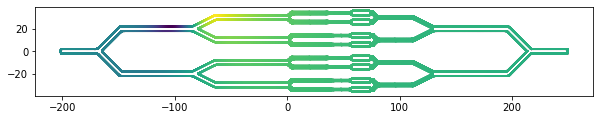

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(src[0],src[1],c=h.real,s=1)
ax.set_aspect('equal')

In [45]:
omega = pipe.compute_omega(h,tol=1e-9,max_iter=1,restart=3000)

	residual = 0.0008981686855774961,	iter = 100,	time = 0.0 mins
	residual = 0.0007206118185047895,	iter = 200,	time = 1.0 mins
	residual = 0.0003677402955475563,	iter = 300,	time = 2.0 mins
	residual = 0.00013096779151567777,	iter = 400,	time = 3.0 mins
	residual = 8.916281317002853e-05,	iter = 500,	time = 3.0 mins
	residual = 3.2820956080885876e-05,	iter = 600,	time = 4.0 mins
	residual = 2.6404234632755394e-05,	iter = 700,	time = 5.0 mins
	residual = 2.1298763832080575e-05,	iter = 800,	time = 7.0 mins
	residual = 1.635123109022495e-05,	iter = 900,	time = 19.0 mins
	residual = 1.4014839358644326e-05,	iter = 1000,	time = 25.0 mins
	residual = 1.3668435632162347e-05,	iter = 1100,	time = 32.0 mins
	residual = 1.3074640673643585e-05,	iter = 1200,	time = 41.0 mins
	residual = 1.1580551816518873e-05,	iter = 1300,	time = 41.0 mins
	residual = 1.0548993345726907e-05,	iter = 1400,	time = 42.0 mins
	residual = 1.860484092933219e-06,	iter = 1500,	time = 43.0 mins
	residual = 3.206229286596751e-07

In [46]:
h_test = U2H(pipe.velocity(test_x,test_y,omega))

In [47]:
np.max(np.abs(h_test - h_exact))

5.005040225780042e-09

In [19]:
pipe.build_omegas(restart=3000,max_iter=1)

	residual = 0.13667626511754297,	iter = 100,	time = 0.0 mins
	residual = 0.08698075228481895,	iter = 200,	time = 1.0 mins
	residual = 0.0777696582905878,	iter = 300,	time = 2.0 mins
	residual = 0.07282222420718752,	iter = 400,	time = 3.0 mins
	residual = 0.07151000052993298,	iter = 500,	time = 4.0 mins
	residual = 0.06842645283847322,	iter = 600,	time = 5.0 mins
	residual = 0.06516128757259496,	iter = 700,	time = 6.0 mins
	residual = 0.060199657152346125,	iter = 800,	time = 6.0 mins
	residual = 0.057901228562761343,	iter = 900,	time = 7.0 mins
	residual = 0.05637867692643311,	iter = 1000,	time = 8.0 mins
	residual = 0.05541610825137047,	iter = 1100,	time = 9.0 mins
	residual = 0.053797879289787964,	iter = 1200,	time = 10.0 mins
	residual = 0.05143031902997965,	iter = 1300,	time = 12.0 mins
	residual = 0.03446879959810841,	iter = 1400,	time = 13.0 mins
	residual = 0.002802643443064621,	iter = 1500,	time = 14.0 mins
	residual = 0.0006941803591124273,	iter = 1600,	time = 15.0 mins
	residu

In [20]:
np.real(np.sum(pipe.omegas[0]*np.conjugate(pipe.dt)))

7.482654496016039e-10

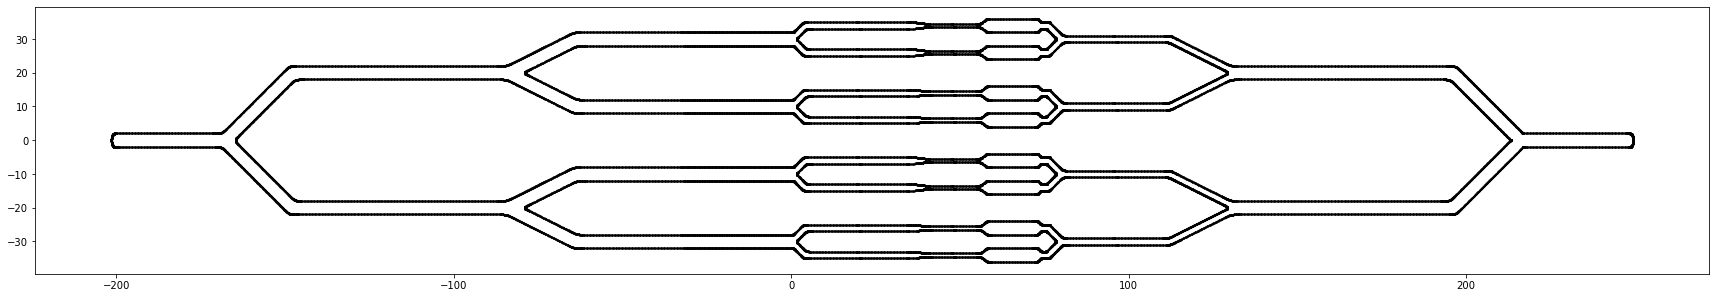

In [21]:
fig, ax = plt.subplots(figsize=(30,10))
ax.set_aspect('equal')
ax.set_facecolor('white')

ax.scatter(pipe.t.real,pipe.t.imag,s=.5,c='k')

Text(0.5, 0.98, 'gmres convergence plot, my python version, without restart, with nullspace removed')

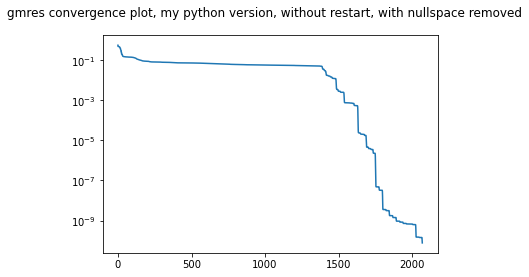

In [22]:
fig, ax = plt.subplots()
ax.set_facecolor('white')
ax.semilogy(pipe.callbacks[-1].residuals)
fig.suptitle('gmres convergence plot, my python version, without restart, with nullspace removed')

In [23]:
with open("./global_built.pickle","wb") as f:
    pickle.dump(pipe,f)